In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# 이걸로 학습하고 검증하고 평가까지 전부 다 할 것
train_df = pd.read_csv("../datasets/space/train.csv")

In [4]:
# 이걸로 예측 (model.predict 할 때만 사용)
test_df = pd.read_csv("../datasets/space/test.csv")

In [5]:
# 우리가 배운 내용을 최대한 적용시켜서 머신러닝하기 (지도 학습으로)

In [6]:
print(train_df.columns)
print("-------------")
print(test_df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
-------------
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [7]:
# 0. EDA (데이터가 어떻게 생겼는지 확인)

In [8]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [10]:
train_df.dtypes
# Transported 있음

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [11]:
test_df.dtypes
# Transported 없음

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [12]:
# null값이 있는지 확인 (결측치) : 있음
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
# null값이 있는지 확인 (결측치) : 있음
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [14]:
# 둘 다 결측치 없애기
test_df.dropna(inplace=True)
test_df.isna().sum()

train_df.dropna(inplace=True)
train_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [15]:
train_df.head()
# 서비스에 0원 쓴 사람들도 결측치가 아니고 0원이라고 잘 나오지 확인

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- PassengerId : 승객 ID

- HomePlanet : 출발지

- CryoSleep : 취침 방식

- Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)

- Destination : 목적지

- Age : 승객의 나이

- VIP : 승객의 VIP 서비스 유무

- RoomService : 룸서비스 지불 금액

- FoodCourt : 푸드코드 지불 금액

- ShoppingMall : 쇼핑몰 지불 금액

- Spa : 스파 지불 금액

- VRDeck : VRDeck 지불 금액

- Name : 이름

- Transported : 도착 여부

In [16]:
# 데이터 준비 : 무엇을 x로 하고, 무엇을 y로 해야 할지
# 나이, VIP 여부, 결제한 금액들이 도착 여부에 영향을 미쳤는지 알아보고 싶다

# x : Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
# y : Transported

In [17]:
train_df = train_df[["Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]]
train_df

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [18]:
train_df.dtypes
# VIP랑 Transported를 숫자 형식으로 바꿔야 함

Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [19]:
train_df["VIP"]

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 6606, dtype: object

In [20]:
train_df["Transported"]

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6606, dtype: bool

In [21]:
# VIP 여부를 0 또는 1로 바꾸자
# VIP라면 (Ture) : 1
# VIP가 아니라면 (False) : 0

train_df["VIP"] = train_df["VIP"].map(lambda x: 0 if x == True else 1)
train_df

C:\Users\heeji\AppData\Local\Temp\ipykernel_34644\3538166950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["VIP"] = train_df["VIP"].map(lambda x: 0 if x == True else 1)


,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,1,0.0,0.0,0.0,0.0,0.0,False
1,24.0,1,109.0,9.0,25.0,549.0,44.0,True
2,58.0,0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,1,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,41.0,0,0.0,6819.0,0.0,1643.0,74.0,False
8689,18.0,1,0.0,0.0,0.0,0.0,0.0,False
8690,26.0,1,0.0,0.0,1872.0,1.0,0.0,True
8691,32.0,1,0.0,1049.0,0.0,353.0,3235.0,False


In [22]:
# Transported 여부를 0 또는 1로 바꾸자
# 도착했다면 (Ture) : 1
# 도착 못 했다면 (False) : 0

train_df["Transported"] = train_df["Transported"].map(lambda x: 0 if x == True else 1)
train_df

C:\Users\heeji\AppData\Local\Temp\ipykernel_34644\4158858972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Transported"] = train_df["Transported"].map(lambda x: 0 if x == True else 1)


,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,1,0.0,0.0,0.0,0.0,0.0,1
1,24.0,1,109.0,9.0,25.0,549.0,44.0,0
2,58.0,0,43.0,3576.0,0.0,6715.0,49.0,1
3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,1
4,16.0,1,303.0,70.0,151.0,565.0,2.0,0
...,...,...,...,...,...,...,...,...
8688,41.0,0,0.0,6819.0,0.0,1643.0,74.0,1
8689,18.0,1,0.0,0.0,0.0,0.0,0.0,1
8690,26.0,1,0.0,0.0,1872.0,1.0,0.0,0
8691,32.0,1,0.0,1049.0,0.0,353.0,3235.0,1


In [23]:
# VIP랑 Transported 모두 int로 바뀜
train_df.dtypes


Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

In [24]:
# 상관 관계를 알아보자
# 생각보다 Transported랑 관계가 다들 그렇게 크지 않음 
# (가장 큰 게 RoomService 0.24 정도)

corr = train_df.corr()
corr

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,-0.098138,0.074783,0.135844,0.042314,0.123820,0.105031,0.082553
VIP,-0.098138,1.000000,-0.029009,-0.135386,-0.013660,-0.064792,-0.130061,-0.042260
RoomService,0.074783,-0.029009,1.000000,-0.013614,0.060478,0.012472,-0.026002,0.247291
FoodCourt,0.135844,-0.135386,-0.013614,1.000000,-0.012320,0.215995,0.216997,-0.055025
ShoppingMall,0.042314,-0.013660,0.060478,-0.012320,1.000000,0.022168,0.000383,-0.011602
Spa,0.123820,-0.064792,0.012472,0.215995,0.022168,1.000000,0.149447,0.219854
VRDeck,0.105031,-0.130061,-0.026002,0.216997,0.000383,0.149447,1.000000,0.207950
Transported,0.082553,-0.042260,0.247291,-0.055025,-0.011602,0.219854,0.207950,1.000000


<Axes: >

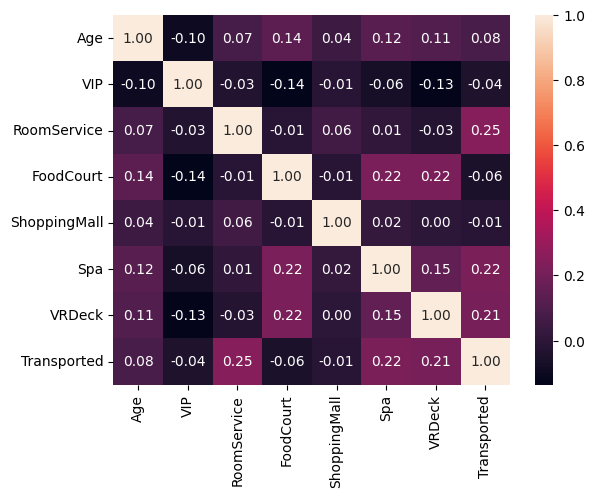

In [25]:
sns.heatmap(corr.values, annot=True, fmt='.2f', xticklabels=["Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"], yticklabels=["Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"])

In [26]:
# 1. 데이터 준비
x = train_df[["Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
y = train_df[["Transported"]]

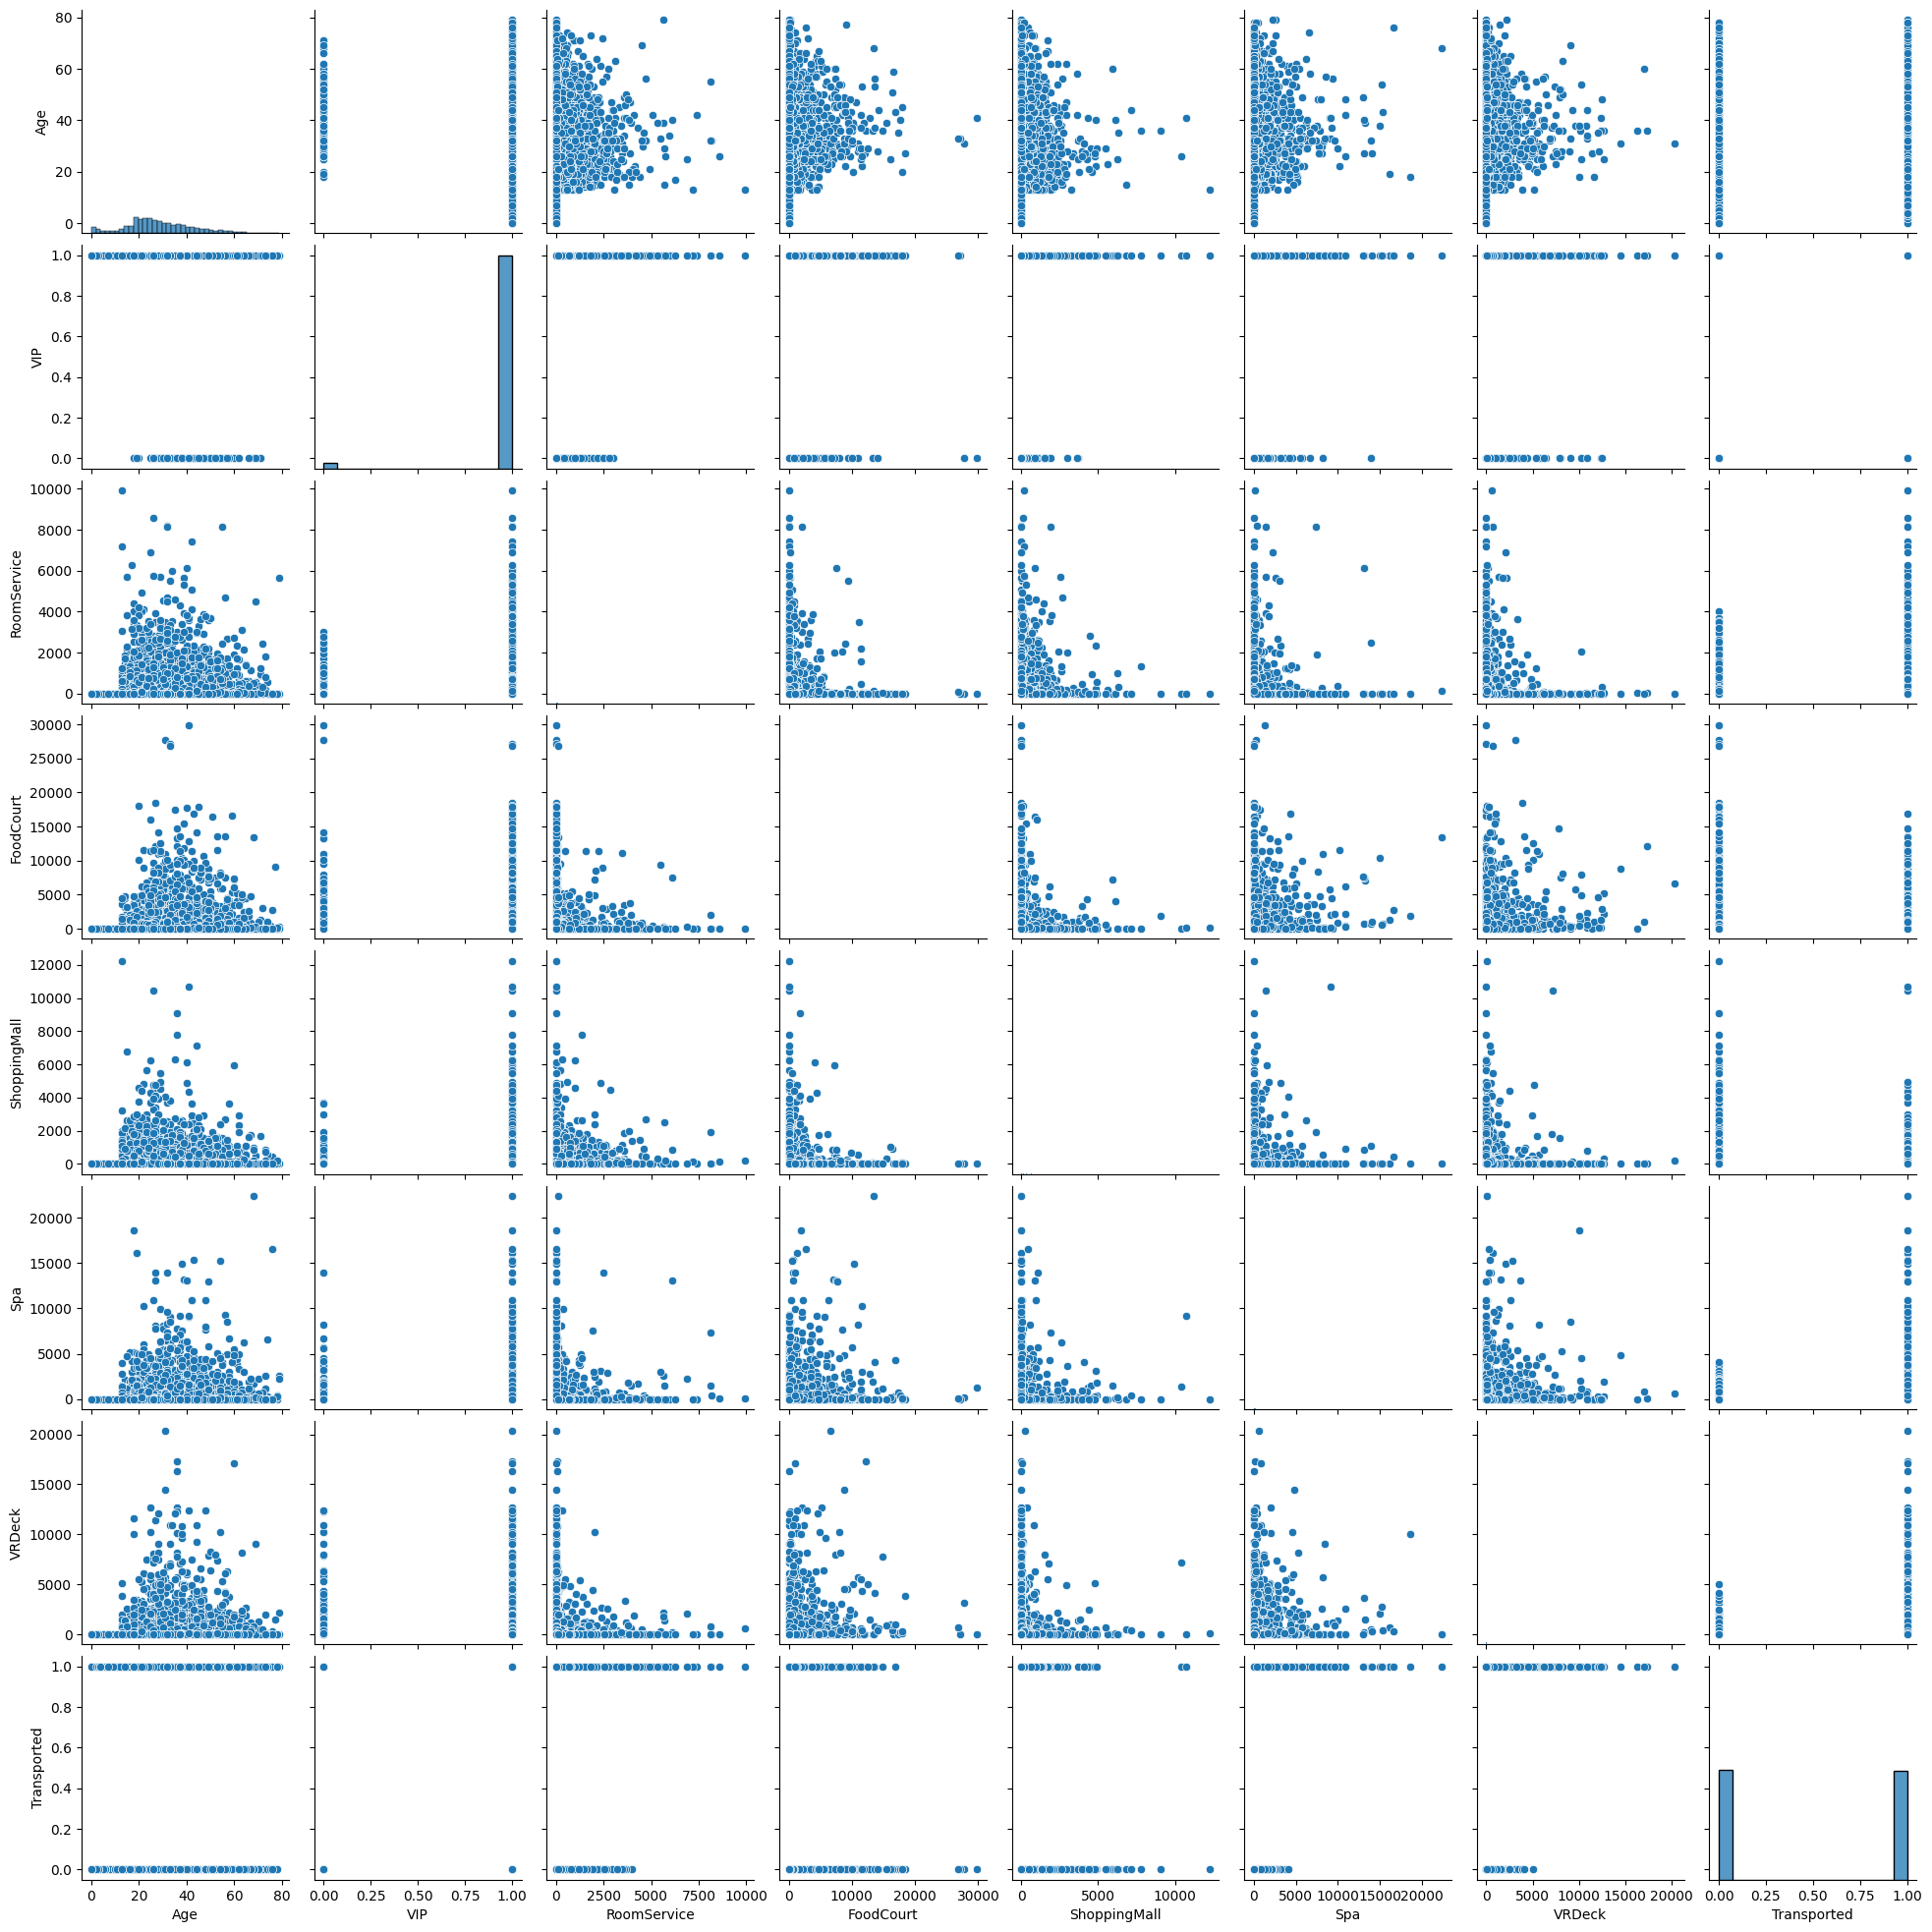

In [45]:
sns.pairplot(train_df)

<Axes: xlabel='Age', ylabel='Transported'>

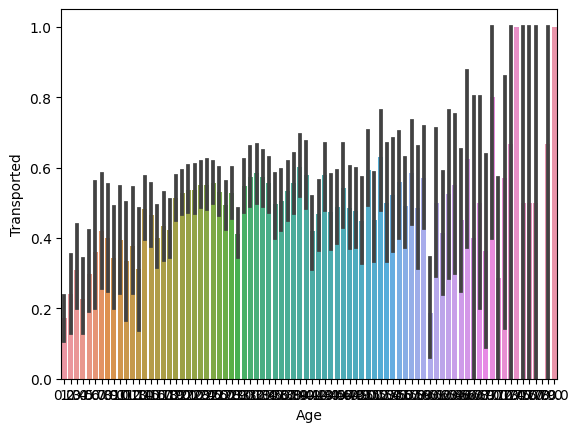

In [47]:
sns.barplot(data=train_df, x="Age", y="Transported")
# 나이가 많을수록 더 잘 도착했다(생존)

<Axes: xlabel='VIP', ylabel='Transported'>

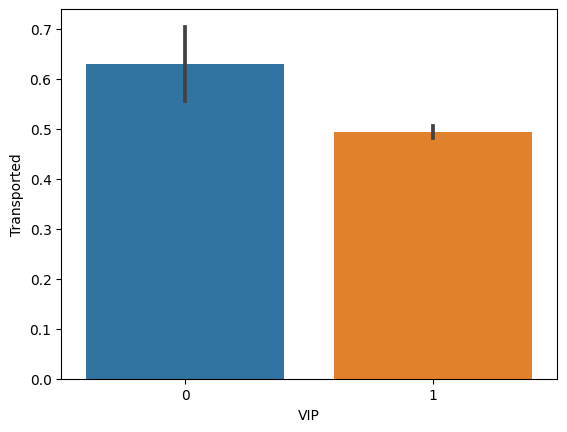

In [48]:
sns.barplot(data=train_df, x="VIP", y="Transported")
# vip가 아닐수록 더 잘 도착했다(생존)

<Axes: xlabel='VIP', ylabel='RoomService'>

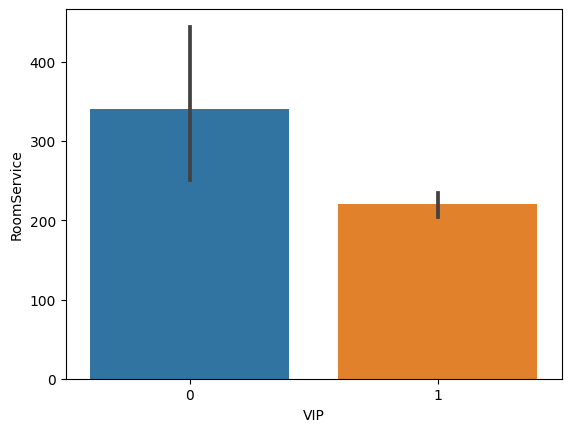

In [52]:
sns.barplot(data=train_df, x="VIP", y="RoomService")
# VIP가 아닌 사람들이 룸서비스에 돈을 더 많이 사용했다

In [27]:
# 1-2. 스케일링
# x 데이터들, y 데이터들의 범위를 정해야 함

x_scale = StandardScaler().fit_transform(x)

In [28]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scale)
x_pca.shape

# shape가 2개로 떨어졌는지 확인

(6606, 2)

In [29]:
x_df_pca = pd.DataFrame(x_pca, columns=["pca_component_1", "pca_component_2"])
x_df_pca

,pca_component_1,pca_component_2
0,-0.224886,-0.088415
1,-0.373630,-0.306020
2,6.434587,0.162927
3,1.462228,-0.131515
4,-0.552900,-0.147147
...,...,...
6601,4.993363,-0.434923
6602,-0.784444,-0.553208
6603,-0.410169,1.514575
6604,1.425550,-0.957910


In [30]:
# 2. 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=1)

In [31]:
# 3. 모델 선택 : 분류인지 예측인지를 생각해서 적절한 스코어를 낼 수 있는 모델 선택
model01 = LinearRegression()

In [32]:
# 4. 학습
model01.fit(x_train, y_train)

LinearRegression()

In [33]:
# 5. 예측
predict = model01.predict(x_test)
predict

array([[0.38926129],
       [0.38405582],
       [0.4210325 ],
       ...,
       [0.60230226],
       [0.38926129],
       [0.37327627]])

In [34]:
# 평가
model01.score(x_test, y_test)

# 0.15....?
# 앞서 상관관계에서 알아봤던 것처럼 x랑 y랑 별 상관이 없는듯함

0.15486894206031476

In [35]:
# PolynomialFeatures으로 다시 해보자

poly = PolynomialFeatures(degree=10)
x_poly = poly.fit_transform(x)


In [41]:
poly.get_feature_names_out()

array(['1', 'Age', 'VIP', ..., 'Spa^2 VRDeck^8', 'Spa VRDeck^9',
       'VRDeck^10'], dtype=object)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=1)

In [43]:
model02 = LinearRegression()
model02.fit(x_train, y_train)

LinearRegression()

In [44]:
model02.score(x_test, y_test)

# 258610472960071.84....?

-258610472960071.84